<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Получение-данных-свечей" data-toc-modified-id="Получение-данных-свечей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Получение данных свечей</a></span></li><li><span><a href="#Получаем-результаты-тестов" data-toc-modified-id="Получаем-результаты-тестов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Получаем результаты тестов</a></span></li><li><span><a href="#Расчет-показательей-эффективности" data-toc-modified-id="Расчет-показательей-эффективности-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет показательей эффективности</a></span><ul class="toc-item"><li><span><a href="#Расчет-коэфициента-Шарпа" data-toc-modified-id="Расчет-коэфициента-Шарпа-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет коэфициента Шарпа</a></span></li></ul></li><li><span><a href="#Добавление-индикаторов" data-toc-modified-id="Добавление-индикаторов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Добавление индикаторов</a></span><ul class="toc-item"><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Пересечение-скользящих-средних" data-toc-modified-id="Пересечение-скользящих-средних-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Пересечение скользящих средних</a></span></li></ul></li><li><span><a href="#Визуализация-тестирования" data-toc-modified-id="Визуализация-тестирования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Визуализация тестирования</a></span></li></ul></div>

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import open_finam_data
import trad_analysis

In [3]:
# НАстройка отображения графиков
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
import matplotlib.dates as mdates
import pylab
plt.rcParams['figure.figsize'] = (20, 12)

## Получение данных свечей

In [4]:
tolls_path_list = ['HYDR_190101_200425.csv','POLY_190101_200425.csv','YNDX_190101_200425.csv', 'TATN_190101_200425.csv']
df_dikt = {}
for toll_path in tolls_path_list:
    df = open_finam_data.open('../../input/' + toll_path)
    #  Фильтр дат
    df = df.loc[df.index >= '2019-10-23']
    df = df.loc[df.index <= '2020-03-14']
    df_dikt[toll_path.split('_')[0]] = df

## Получаем результаты тестов

In [5]:
t = trad_analysis.Analysis(df_dikt).get_two_ma_samp()

In [6]:
t = t.get_test()

Инструмент: HYDR Состояние на конец периода: 109047.95793499998
Инструмент: POLY Состояние на конец периода: 99544.63170499998
Инструмент: YNDX Состояние на конец периода: 101210.98162
Инструмент: TATN Состояние на конец периода: 90918.73801500004


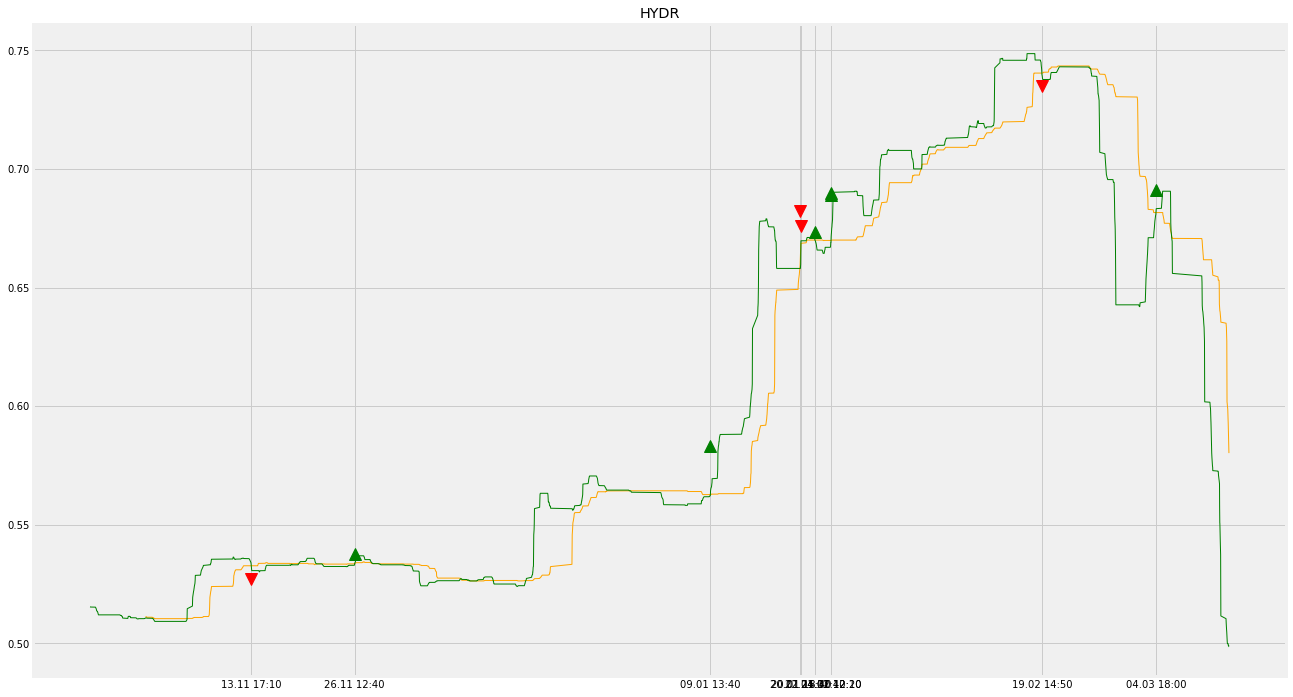

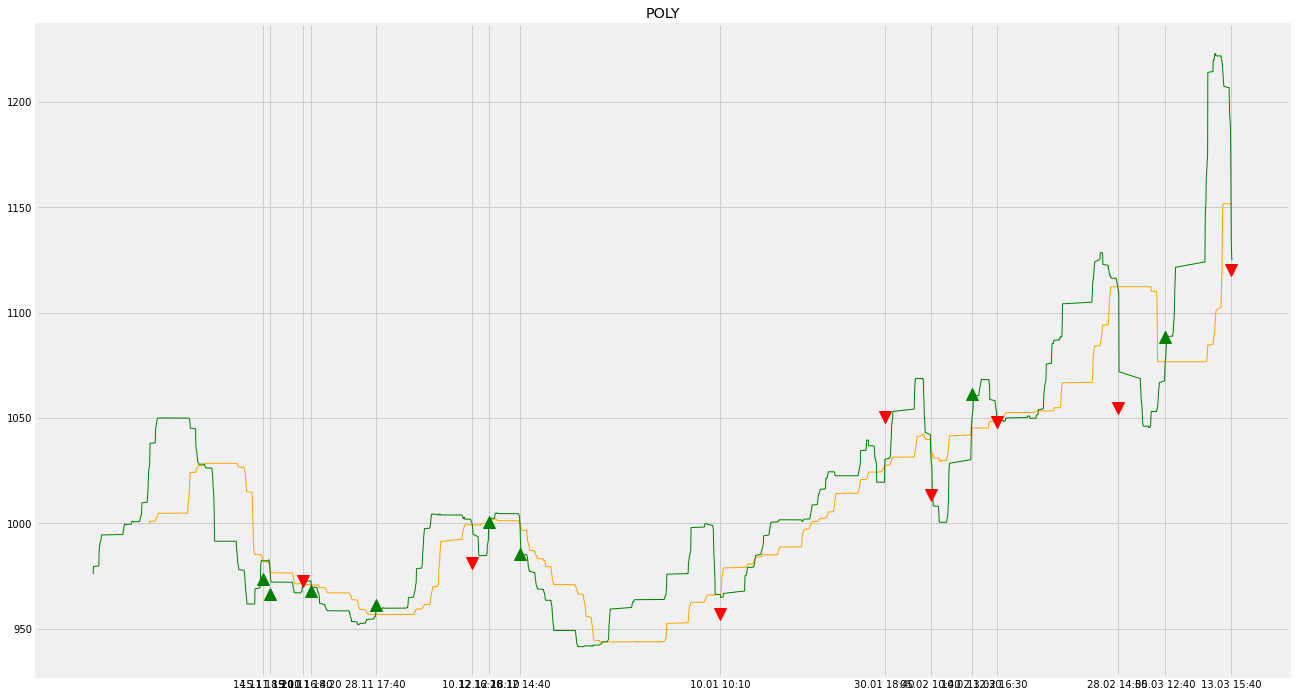

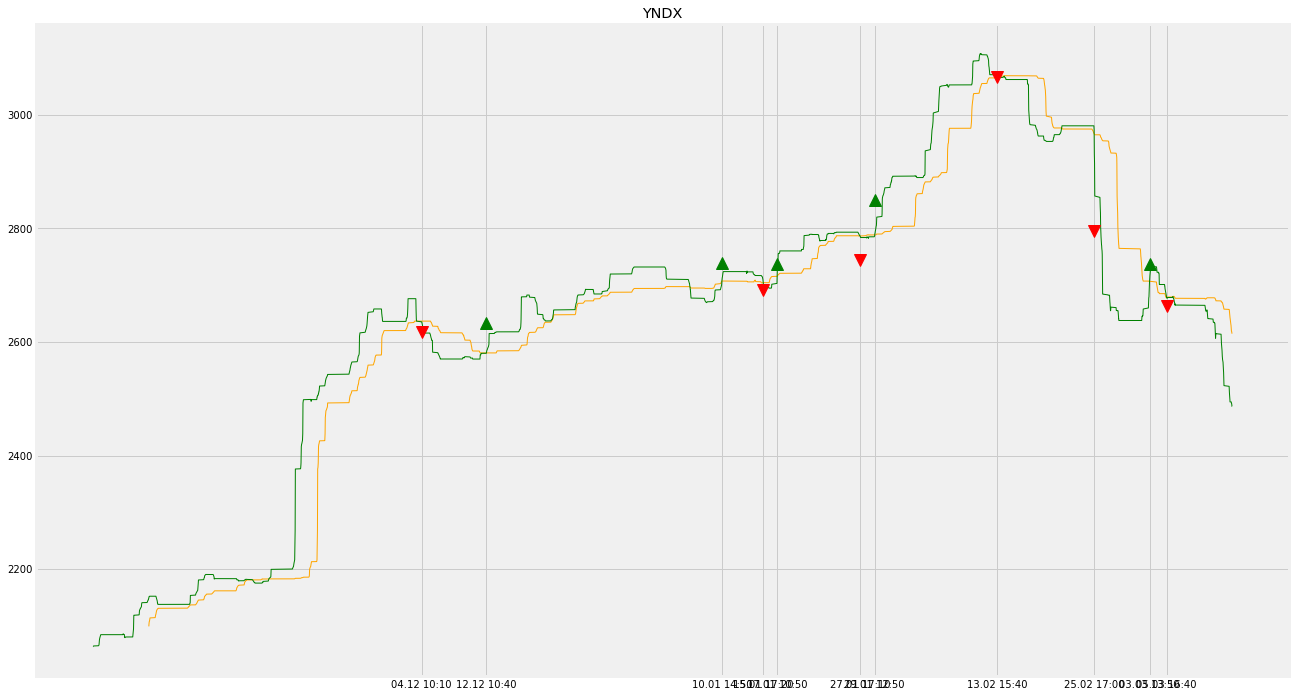

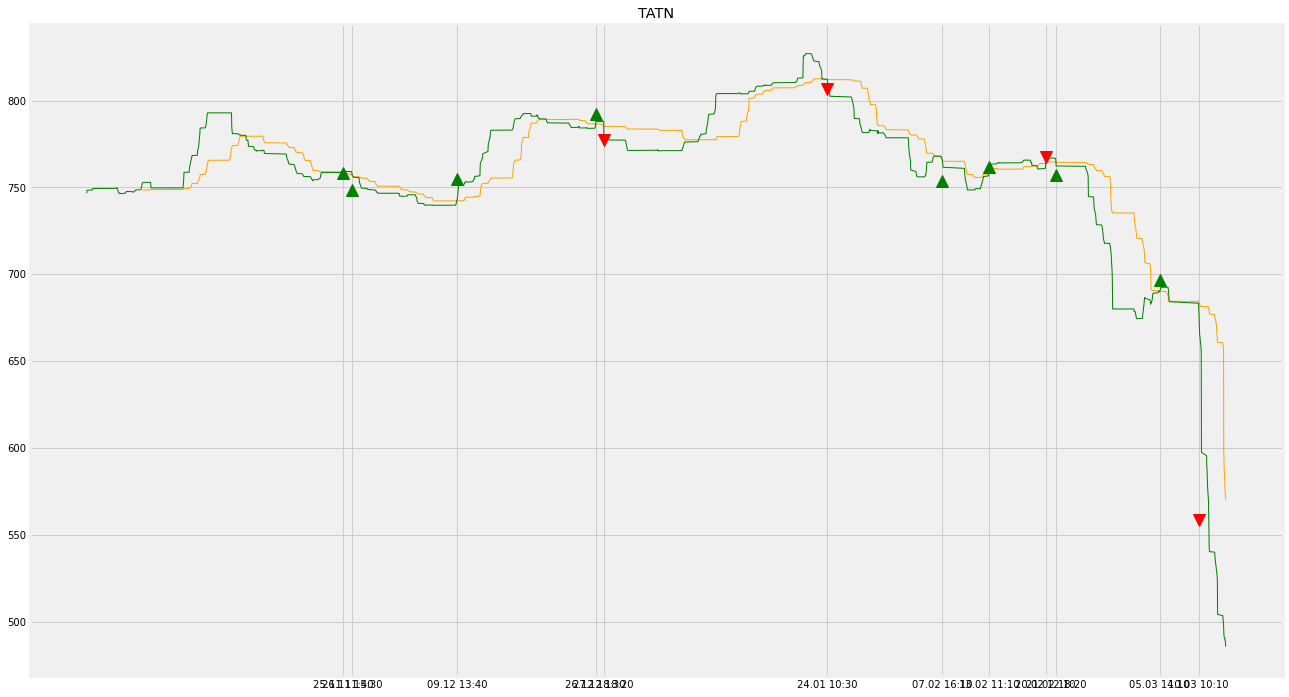

In [7]:
# График для торговли по пересечениям

for df_toll in list(t.df_dikt):
    fig, ax = plt.subplots()
    ax = pylab.subplot(1, 1, 1)
    ax.set_title(df_toll)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m %H:%M'))
    plt.xticks(df_dikt[df_toll][df_dikt[df_toll].SIGNAL == True].index)
    ax.plot(df_dikt[df_toll].ma_samp_slow.dropna(),linewidth=1, color='orange')
    ax.plot(df_dikt[df_toll].ma_samp_fast.dropna(),linewidth=1, color='green')
    ax.plot(df_dikt[df_toll][(df_dikt[df_toll].POZISION == 'short')&(df_dikt[df_toll].SIGNAL == True)].CLOSE, 'rv', markersize=12)
    ax.plot(df_dikt[df_toll][(df_dikt[df_toll].POZISION == 'long')&(df_dikt[df_toll].SIGNAL == True)].CLOSE, 'g^', markersize=12)
    plt.show()

## Расчет показательей эффективности

In [8]:
t.prof_calculation()

HYDR
Количество сделок: 9
Количество удачных:0.7142857142857143
MAXSIMUM_DROP: 0.009509905350217594
LENGTH_DROP: 10 days 18:30:00
SHARP: 0.07541283306541195
POLY
Количество сделок: 16
Количество удачных:0.14285714285714285
MAXSIMUM_DROP: 0.04697610062488308
LENGTH_DROP: 7 days 10:30:00
SHARP: -0.193520421099193
YNDX
Количество сделок: 10
Количество удачных:0.375
MAXSIMUM_DROP: 0.013557360691536026
LENGTH_DROP: 7 days 02:50:00
SHARP: -0.010486798475116273
TATN
Количество сделок: 12
Количество удачных:0.4
MAXSIMUM_DROP: 0.12649123083473865
LENGTH_DROP: 7 days 06:30:00
SHARP: -0.09334808400538802


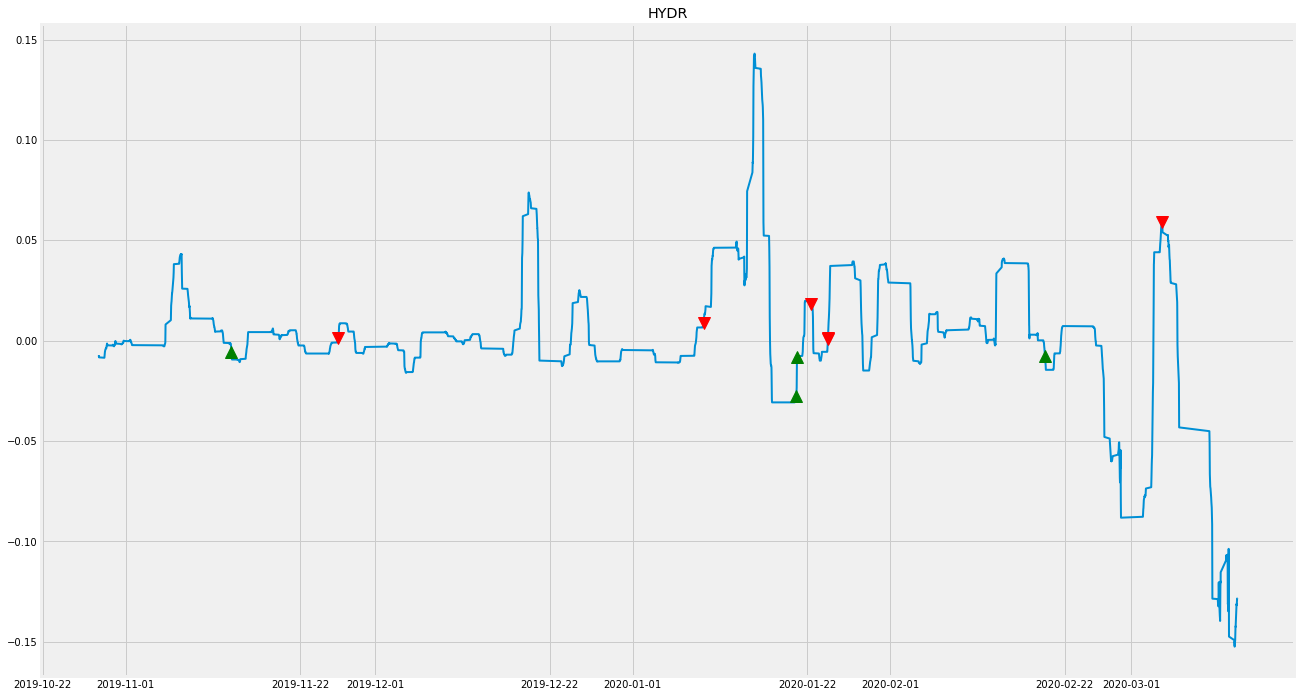

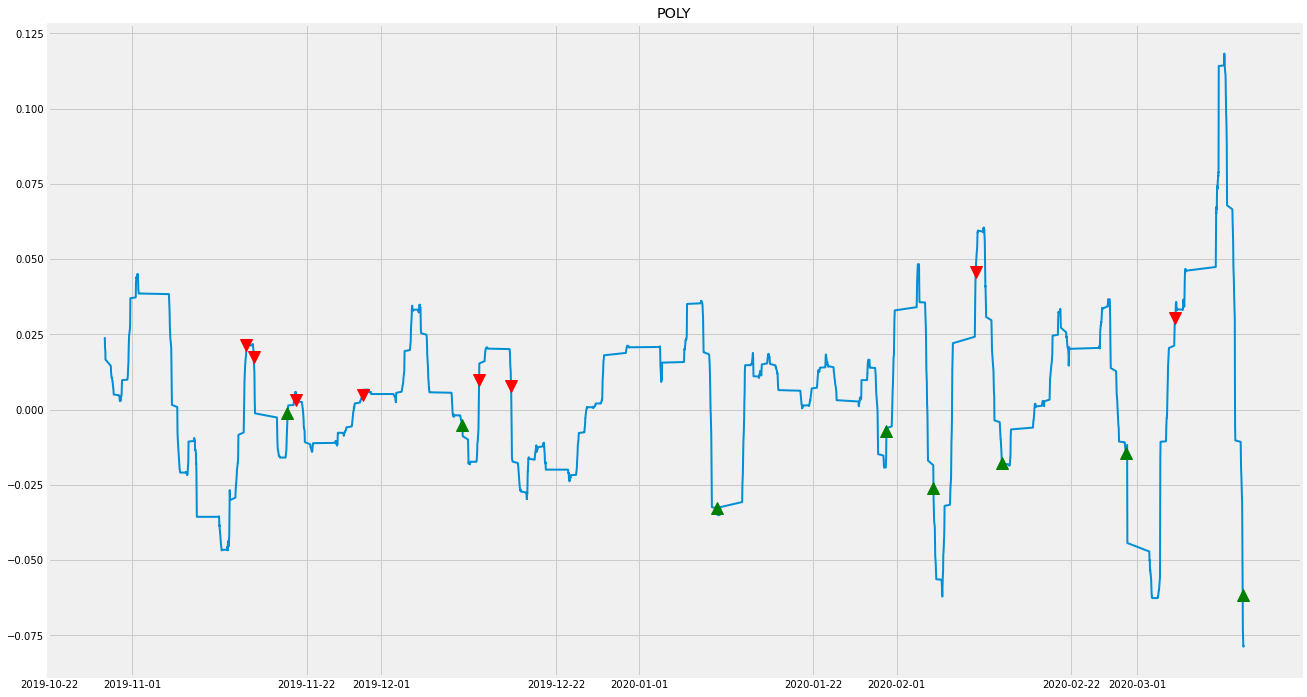

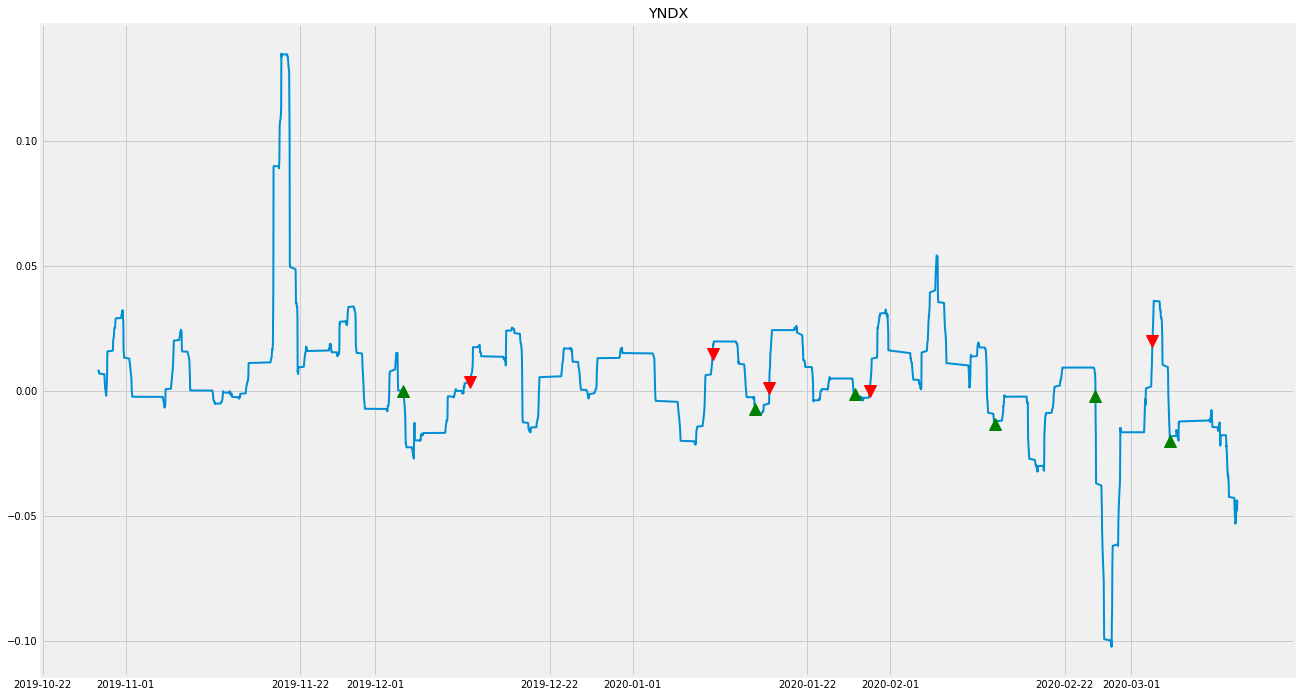

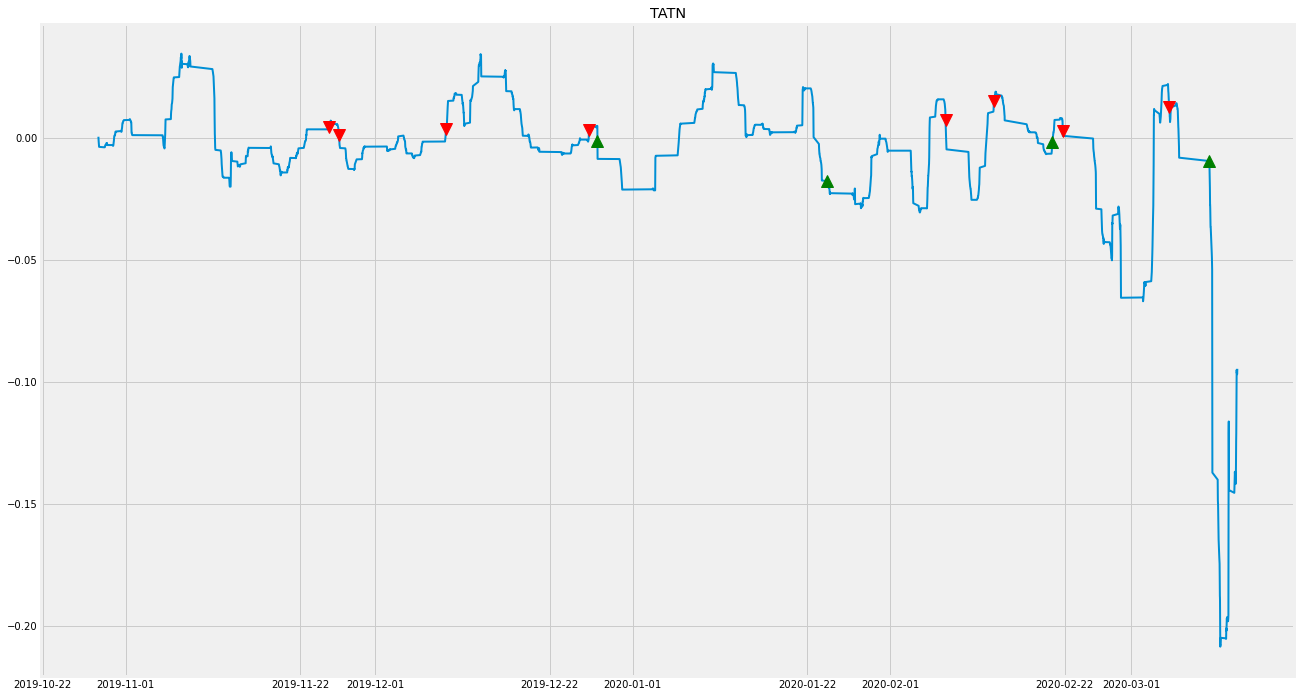

In [11]:
# График изменения ma_samp_fast_pct_change
for df_toll in list(t.df_dikt):
    fig, ax = plt.subplots()
    ax = pylab.subplot(1, 1, 1)
    ax.set_title(df_toll)
    ax.plot(df_dikt[df_toll].ma_samp_fast_pct_change.dropna(),linewidth=2)
    ax.plot(df_dikt[df_toll][(df_dikt[df_toll].POZISION == 'short')&(df_dikt[df_toll].SIGNAL == True)].ma_samp_fast_pct_change, 'rv', markersize=12)
    ax.plot(df_dikt[df_toll][(df_dikt[df_toll].POZISION == 'long')&(df_dikt[df_toll].SIGNAL == True)].ma_samp_fast_pct_change, 'g^', markersize=12)   
# Горизонтальные линии
#     ax.hlines(pct_change, data_period_dick['stert'], data_period_dick['end'],linewidth=1)
#     ax.hlines(-1*pct_change, data_period_dick['stert'], data_period_dick['end'],linewidth=1)

In [10]:
t.df_dikt['TATN'][t.df_dikt['TATN'].SIGNAL == True]

,OPEN,HIGH,LOW,CLOSE,VOL,ma_samp_slow,ma_samp_fast,ma_samp_fast_pct_change,SIGNAL,POZISION
DATE_TIME,,,,,,,,,,
2019-11-25 11:40:00,758.7,759.3,757.9,758.4,25967.0,758.90,758.95,0.004699,True,short
2019-11-26 15:30:00,748.6,748.8,748.2,748.6,11368.0,756.65,756.60,0.001125,True,short
2019-12-09 13:40:00,755.7,755.8,754.4,755.1,13169.0,742.20,742.50,0.003650,True,short
2019-12-26 18:30:00,793.3,793.5,792.4,792.4,40915.0,786.60,786.85,0.003379,True,short
2019-12-27 18:20:00,776.4,777.5,776.3,777.1,25316.0,785.30,782.90,-0.001403,True,long
2020-01-24 10:30:00,807.1,807.9,806.4,806.7,12426.0,812.15,812.00,-0.017782,True,long
2020-02-07 16:10:00,754.4,755.5,752.2,753.4,51665.0,766.15,766.00,0.007298,True,short
2020-02-13 11:10:00,759.9,761.6,759.6,761.5,55688.0,759.00,759.80,0.015029,True,short
2020-02-20 12:10:00,767.4,768.0,767.3,767.6,15259.0,764.00,764.40,-0.001698,True,long
